In [213]:
import pandas as pd
import numpy as np
import csv
import math
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

In [214]:
def mse(pre, act):
    er = 0
    for i in range(len(pre)):
        er +=(pre[i][0]-act[i])**2
    er = er/len(pre)
    er = er**(1/2)
    er = er/(sum(act)/len(act))
    return (1-er)*100

In [215]:
def add_data(filename, data):
    to_add = []
    with open('data.csv', mode='r')as csvfile:
        csvFile = csv.reader(csvfile)
        for lines in csvFile:
            to_add.append(lines)

    # data rows of csv file
    rows = [data]

    for i in rows:
        to_add.append(i)

    # writing to csv file
    with open(filename, 'w') as csvfile:
        # creating a csv writer object
        csvwriter = csv.writer(csvfile)

        # writing the data rows
        for j in to_add:
            if (j == []):
                continue
            else:
                csvwriter.writerow(j)


In [216]:
data = pd.read_csv("data.csv")
data = data.sample(frac=1)

In [217]:
data

,Retirement,Debut Age (yrs),Longest Gap b/w innings,Time of best moving avg,No of innings,Time of worst moving avg,time of better score than 20% best scores
67,34.608219,27.520548,637,0.756522,115,0.991304,0.878261
13,35.849315,25.235616,1224,0.128205,78,0.230769,1.000000
77,30.367123,18.643836,1446,0.833333,48,0.541667,0.812500
55,37.180822,22.345205,1106,0.456522,184,0.989130,0.853261
81,32.320548,22.295890,430,0.955224,67,0.194030,0.925373
...,...,...,...,...,...,...,...
9,38.660274,23.424658,328,0.366038,265,0.328302,0.939623
58,31.482192,23.279452,511,0.297710,131,0.480916,0.816794
12,24.958904,22.106849,350,0.800000,25,0.440000,0.800000
87,32.315068,21.679452,1447,0.631579,38,0.342105,0.973684


In [218]:
data.columns

Index(['Retirement', 'Debut Age (yrs)', 'Longest Gap b/w innings',
       'Time of best moving avg', 'No of innings', 'Time of worst moving avg',
       'time of better score than 20% best scores'],
      dtype='object')

In [219]:
# data["Age (yrs)"] = np.random.permutation(data["Age (yrs)"].values)
# data

In [220]:
#Set Target Variable
output_var = pd.DataFrame(data['Retirement'])
#Selecting the Features
features = [
	"Debut Age (yrs)",	"Longest Gap b/w innings",	"Time of best moving avg",	"No of innings",	"Time of worst moving avg",	"time of better score than 20% best scores"
    ]


In [221]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(data[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=data.index)
feature_transform.head()
# feature_transform

,Debut Age (yrs),Longest Gap b/w innings,Time of best moving avg,No of innings,Time of worst moving avg,time of better score than 20% best scores
67,0.685345,0.088570,0.728374,0.345725,0.996892,0.714381
13,0.514163,0.205665,0.011327,0.208178,0.185984,1.000000
77,0.020320,0.249950,0.816033,0.096654,0.517473,0.560096
55,0.297619,0.182126,0.386008,0.602230,0.994574,0.655727
81,0.293924,0.047277,0.955137,0.167286,0.146812,0.824914


In [222]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=8)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [223]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [224]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(5))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy']
             )


In [225]:
history=lstm.fit(X_train, y_train, epochs=500, batch_size=12, verbose=0, shuffle=False)

In [226]:
y_pred= lstm.predict(X_test)
print(lstm.summary())
mean_sqaure_error = mse(y_pred, y_test)

1/1 [==============================] - 0s 152ms/step
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 32)                4992      
                                                                 
 dense_26 (Dense)            (None, 5)                 165       
                                                                 
 dense_27 (Dense)            (None, 1)                 6         
                                                                 
Total params: 5,163
Trainable params: 5,163
Non-trainable params: 0
_________________________________________________________________
None


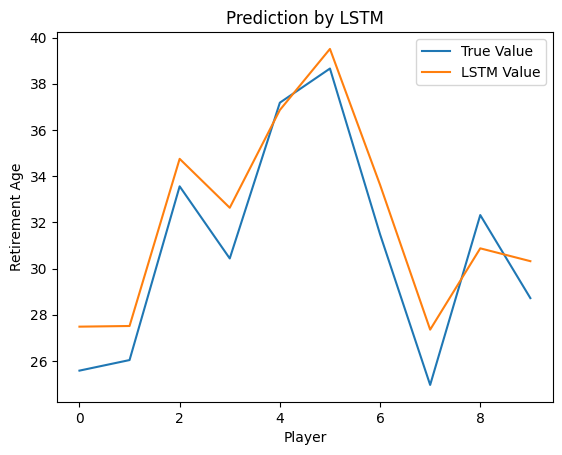

In [227]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Player')
plt.ylabel('Retirement Age')
plt.legend()
plt.show()

In [228]:
c = 0
for j in range(len(y_test)):
    if(y_pred[j][0] > y_test[j]):
        c = c + y_test[j]/y_pred[j][0]
    elif(y_pred[j][0] <= y_test[j]):
        c = c + y_pred[j][0]/y_test[j]
accuracy2 = c/len(y_test)
c = 0
for j in range(len(y_test)):
    c = c + y_pred[j][0]/y_test[j]
accuracy3 = c/len(y_test)

print(mean_sqaure_error)
print(accuracy2)
print(accuracy3)

94.60036401861841
0.9496873400947802
1.0427285348251165
